In [1]:
#!pip install seaborn

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Set a style for consistent visuals
plt.style.use('seaborn-v0_8-whitegrid')  # Good for presentations
# or 
# sns.set_style("whitegrid") # Options: darkgrid, white, ticks
sns.set_palette("pastel")  # Other options: deep, muted, dark, etc.

### Dataset info:

The penguins dataset contains measurements for three species of penguins (Adelie, Gentoo, Chinstrap) from the Palmer Archipelago in Antarctica. 

It includes features like:
species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex

In [2]:
df = sns.load_dataset("penguins")
df.shape

(344, 7)

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [5]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

### Agenda

Goal	Best Plot(s)

Distribution of a variable - histplot, boxplot, violinplot

Compare values across categories - barplot, stripplot, boxplot

Frequency of categories - countplot

Relationships between variables - scatterplot, lmplot

Multivariate exploration - pairplot, heatmap

### Tip:

Categorical vs categorical (countplot)

Numeric vs category (violinplot, barplot)

Correlations (heatmap)

# Distribution Plots

These are used to understand how values in a variable are distributed, i.e., where they are concentrated, whether they're skewed, and if there are outliers.



### 1. Histogram + KDE: histplot

Used to check the distribution of numerical features like income, sales, ratings, etc.

Tip: Helps detect skewness, modality, and spread.

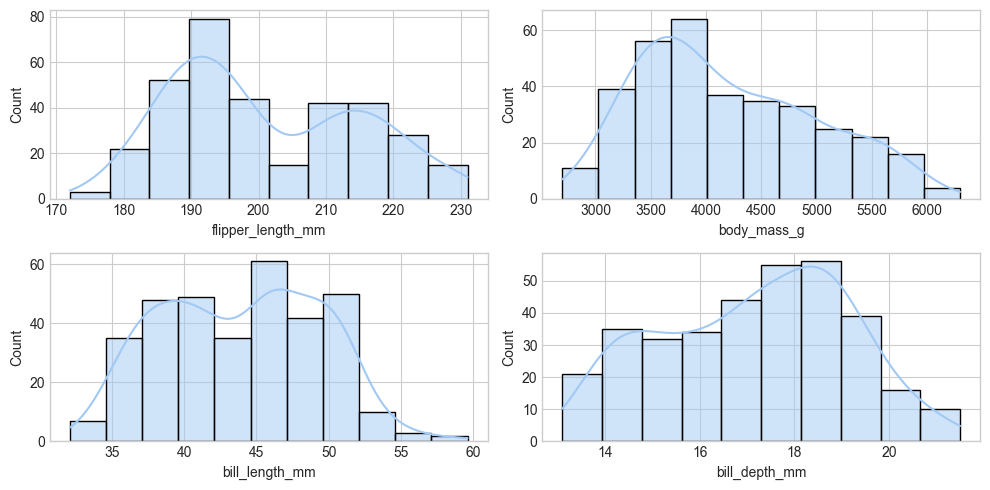

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
sns.histplot(data=df, x="flipper_length_mm", kde=True, ax=ax[0,0], bins=10)
ax[0,0].set_xlabel("flipper_length_mm")
sns.histplot(data=df, x="body_mass_g", kde=True, ax=ax[0,1])
ax[0,1].set_xlabel("body_mass_g")
sns.histplot(data=df, x="bill_length_mm", kde=True, ax=ax[1,0])
ax[1,0].set_xlabel("bill_length_mm")
sns.histplot(data=df, x="bill_depth_mm", kde=True, ax=ax[1,1])
ax[1,1].set_xlabel("bill_depth_mm")
plt.tight_layout()
plt.show()

### 2. Box Plot: 

Perfect for comparing distributions across categories (e.g., customer age by region), and detecting outliers.

What it shows:

Median (line inside the box)

IQR (box)

Whiskers (range)

Outliers (points)

In [7]:
df[["species", "island"]].value_counts()

species    island   
Gentoo     Biscoe       124
Chinstrap  Dream         68
Adelie     Dream         56
           Torgersen     52
           Biscoe        44
Name: count, dtype: int64

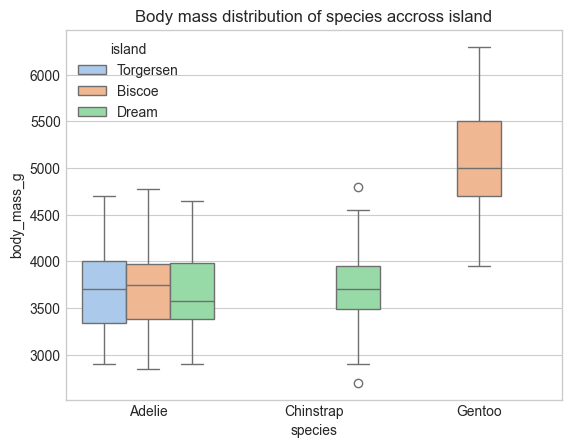

In [8]:
# Compare central tendency and outliers of body mass across species.
sns.boxplot(data=df, x="species", y="body_mass_g", hue="island")
plt.title("Body mass distribution of species accross island")
plt.show()

### 3. Violin Plot:

Combines boxplot + KDE for richer insights.
                      
Tip: Use when you want to see distribution shape + central tendency across groups.

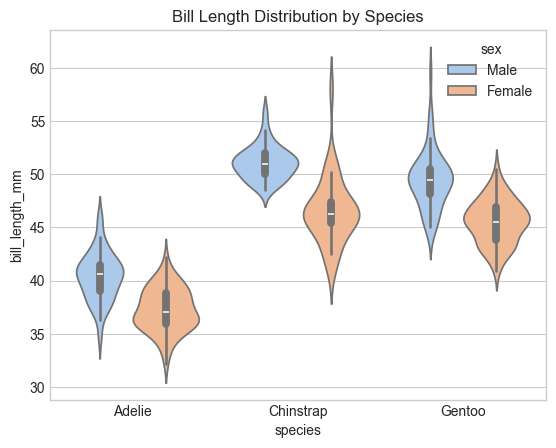

In [9]:
# Useful for understanding how shape of the distribution changes between species.
sns.violinplot(data=df, x="species", y="bill_length_mm", hue="sex")
plt.title("Bill Length Distribution by Species")
plt.show()

# Relationship Plots

Used to visualize correlations and interactions between numerical variables.

### 1. Scatter Plot:

Shows: Relationships, trends, clusters

Tip: Use for bivariate relationships. Add hue or style to explore patterns by group.

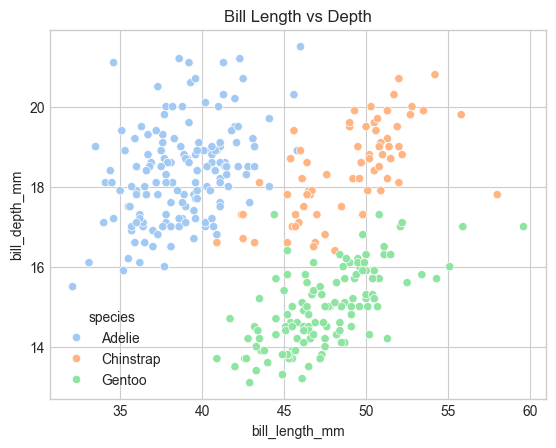

In [10]:
# Helps identify clusters, separability of species based on bill dimensions.

sns.scatterplot(data=df, x="bill_length_mm", y="bill_depth_mm", hue="species")
plt.title("Bill Length vs Depth")
plt.show()

### 2. Regression Plot: lmplot

Adds a regression line to scatter plots

Tip: Use to detect linear trends and how they differ by category (hue).

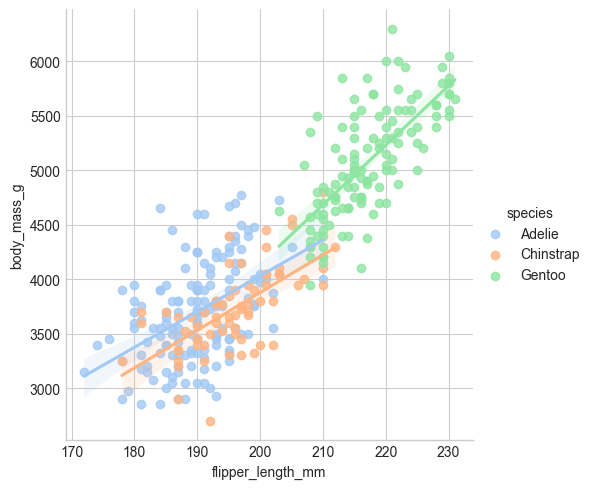

In [11]:
# Shows linear trends – do heavier penguins tend to have longer flippers?
sns.lmplot(data=df, x="flipper_length_mm", y="body_mass_g", hue="species")
plt.show()

# Categorical Plots

Useful when you want to compare or count categories

### 1.  Count Plot:

Great for visualizing how many occurrences of each category exist — e.g., frequency of customer segments, purchases by country

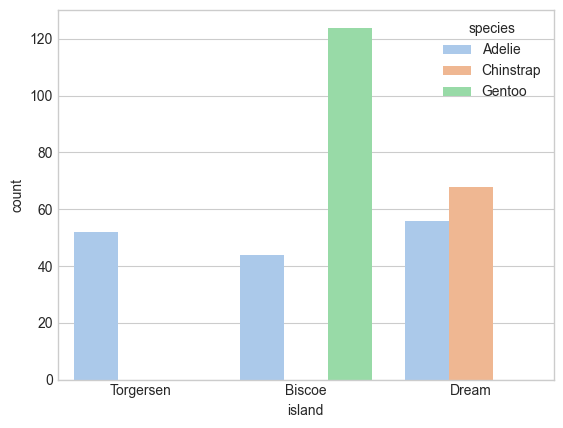

In [12]:
# Great for seeing how different penguin species are distributed geographically.

sns.countplot(data=df, x="island", hue="species")
plt.show()

### 2. Bar Plot:

Best when summarizing a numeric value aggregated over categories.
By default, it shows the mean, but you can use estimator=sum, median, etc.

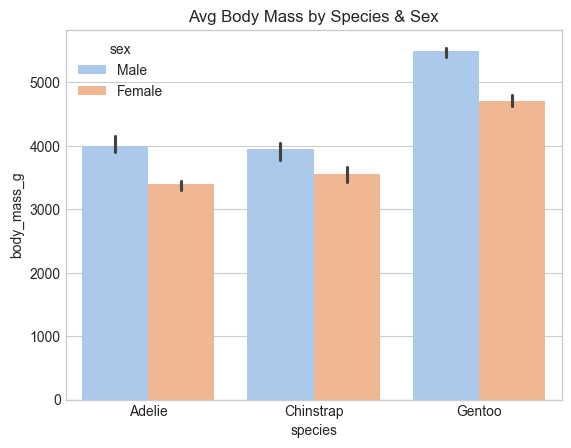

In [13]:
# Summarize average body mass per species per island.
sns.barplot(data=df, x="species", y="body_mass_g", hue="sex", estimator="median")
plt.title("Avg Body Mass by Species & Sex")
plt.show()

### 3. Strip Plot:

Helps see distribution of individual observations. Good for small to medium-sized datasets.

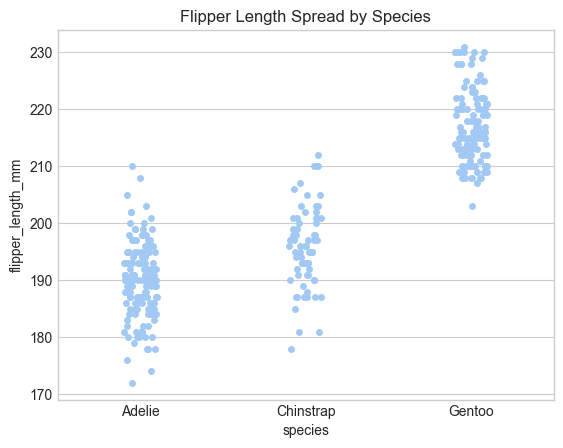

In [14]:
# Visualizes individual data points to detect density and spread.
sns.stripplot(data=df, x="species", y="flipper_length_mm", jitter=True)
plt.title("Flipper Length Spread by Species")
plt.show()

### 4. Boxenplot:

Good for large data with deep distributions

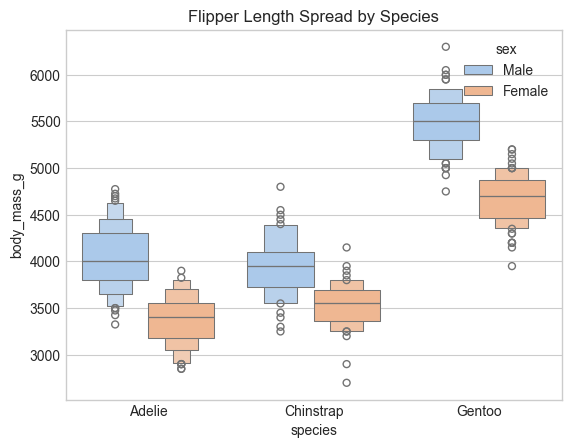

In [15]:
sns.boxenplot(data=df, x='species', y='body_mass_g', hue='sex')
plt.title('Flipper Length Spread by Species')
plt.show()

# Multivariate Analysis

Visualizations for multiple variables, often with hue, style, size for deeper patterns.

### 1. Pair Plot:

Shows pairwise relationships between numeric variables.

Tip: Use when exploring a new dataset to spot correlations, clusters, or group separations.

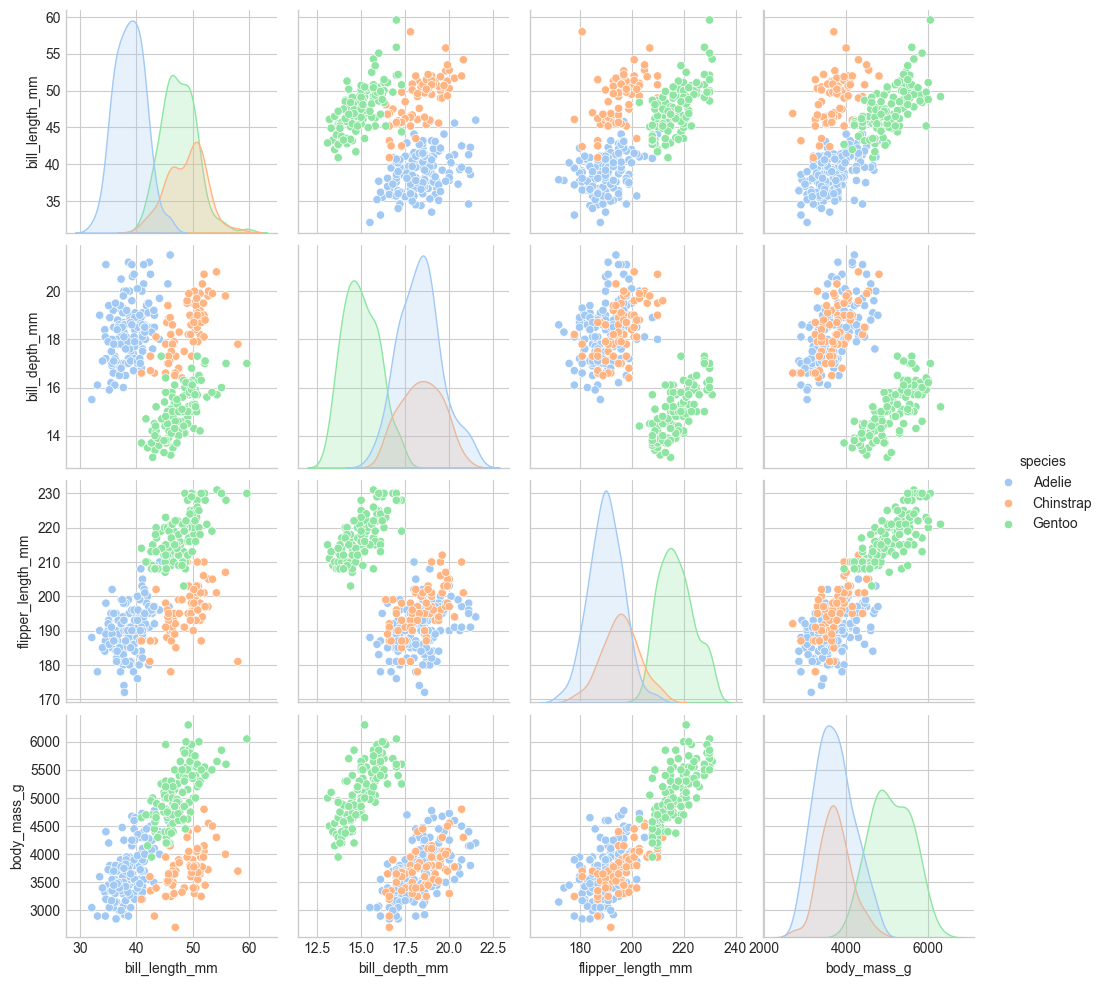

In [16]:
# Explores interactions among multiple numerical variables. Easy way to find separation between classes (species here).
sns.pairplot(df.dropna(), hue="species")
plt.show()

### 2. Heatmap (Correlation Matrix):

Shows how strongly numerical variables correlate.

Tip: Use before regression or PCA to detect multicollinearity.

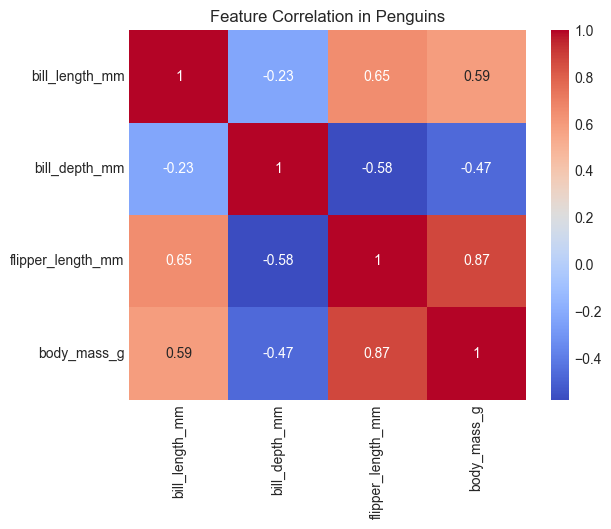

In [17]:
# Shows which features are correlated – useful for feature selection.
corr = df.dropna().corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation in Penguins")
plt.show()

# Bonus: Multi-panel Plots using FacetGrid

FacetGrid is great for creating the same type of plot split by one or two categorical variables.

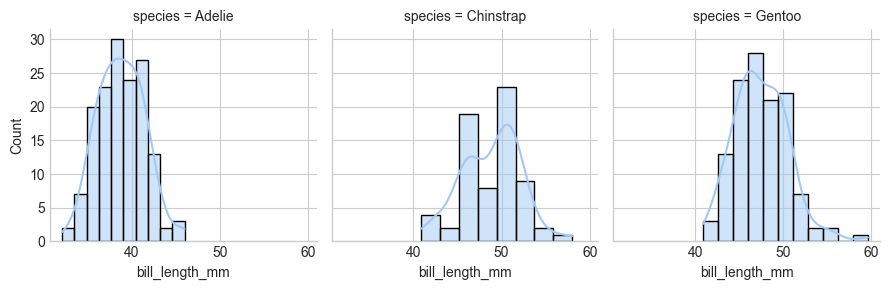

In [18]:
# Example: Histogram of bill lengths split by species
g =sns.FacetGrid(data=df, col="species")
g.map(sns.histplot, "bill_length_mm", kde=True)
plt.show()

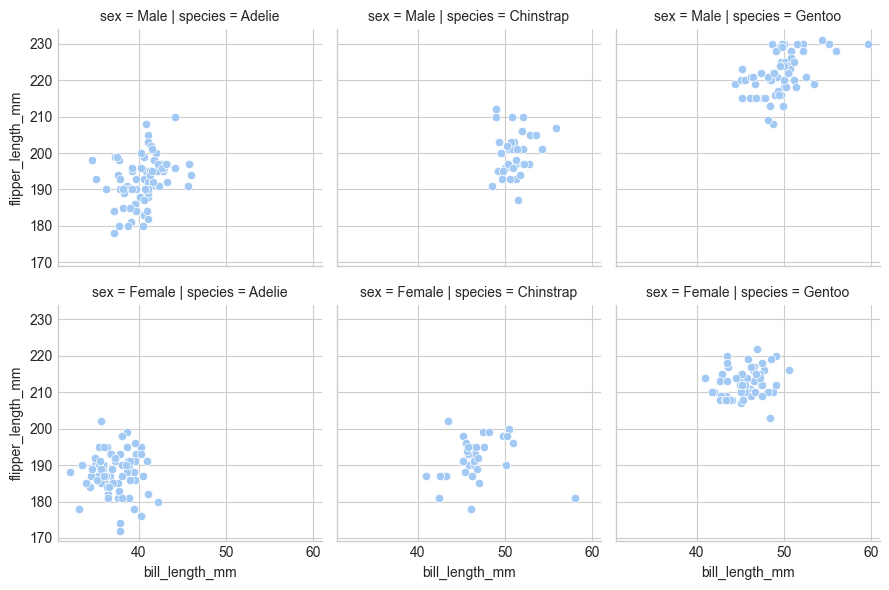

In [19]:
# Scatter plot split by sex and species
g = sns.FacetGrid(data=df, row="sex", col="species")
g.map(sns.scatterplot, "bill_length_mm", "flipper_length_mm")
plt.show()

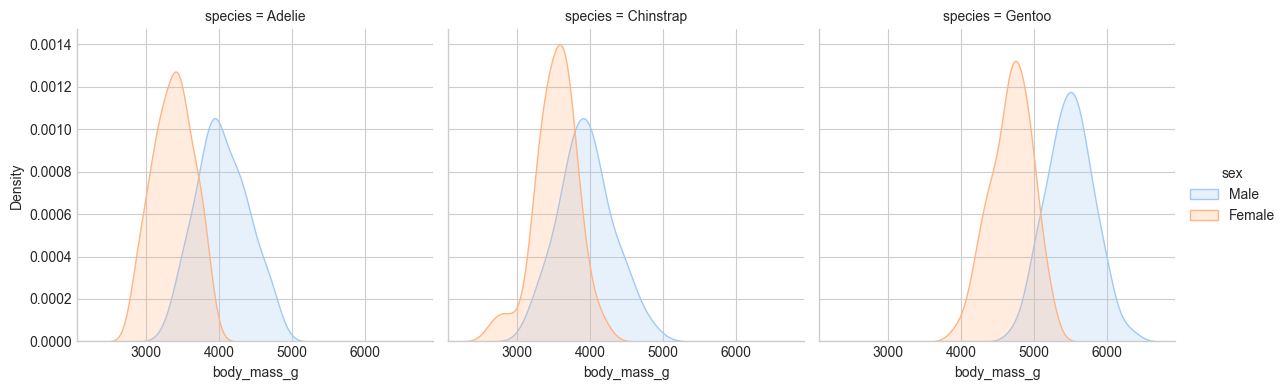

In [20]:
# Using hue inside FacetGrid
g = sns.FacetGrid(data=df, col='species', hue='sex', height=4)
g.map(sns.kdeplot, "body_mass_g", fill=True).add_legend()
plt.show()